# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

[Данные о COVID-19 в Индии](https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv)

In [2]:
#df = pd.read_csv('googleplaystore.csv',sep=',')
df = pd.read_csv('covid_19_india.csv',sep=',')

In [3]:
df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2


In [4]:
#df.groupby(by='Category').count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15554 non-null  int64 
 1   Date                      15554 non-null  object
 2   Time                      15554 non-null  object
 3   State/UnionTerritory      15554 non-null  object
 4   ConfirmedIndianNational   15554 non-null  object
 5   ConfirmedForeignNational  15554 non-null  object
 6   Cured                     15554 non-null  int64 
 7   Deaths                    15554 non-null  int64 
 8   Confirmed                 15554 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [98]:
#Убираем не заполненый рейтинг
df.Rating.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### Первые наброски
1. Числовые данные только одни в базовом дата сете - Рэйтинг.
2. Есть псевдочисловые требуют обработки и интепритации - размер, Кол-во установок, цена , отзывы.
    * Отзывы - преобразования сокращений и превидение всех данных в единый вид с преобразованием типа.. т.е. записи 1, 1000, 3.0М должны быть в одно целочисленном виде 1,1000,3000000 и т.д.
    * Рэйтинг много пустых и есть выбросы. Нужно обработать. Пустые заполнить 0, выбросы "приземлить" в рейтинге оценка от 1 до 5, соотвественно все данные "причесать" в данном диапазоне и оценку 19 преобразовать в 5.
    * Размер, все данные внесены в разных форматах: текст, Мбайты, Кб, и т.п. для графической обработки и анализа данных преобразовать в единые диапазоны по приложениям до 1Мб, до 20 Мб и т.п. Для оценки диапазонов можно воспользоваться гистограмой(оценить частоты встречаемых размеров). Редкие размеры можно схлопнуть в большие группы.
    * Цена аналогично размеру.
    * Кол-во установок необходимо преобразовать к числам и интервалам.
3. Графики возможно групировать по Жанрам/Категориям и/или рейтингу контента - для всех, для детей, для взрослых и т.п.
4. Можно дополнить данными об оценке позитивной, негативной, нейтральной приложения пользователями по отзывам.

!!! Обрабатываем ошибочную строку с пропуском категории приложения в первую очередь.

In [75]:
#df = df['Reviews'].astype(int)
#Преобразуем функцией...Кол-во отзывов в целое число.
#После исправления ошибки дата сета данное преобразование не нужно.
def rev_trans(col):
    if col.isdigit():
        return int(col)
    if col == '3.0M':
        return 3000000
def trans_size(col):
    
#df['Reviews'] = df.Reviews.apply(rev_trans)

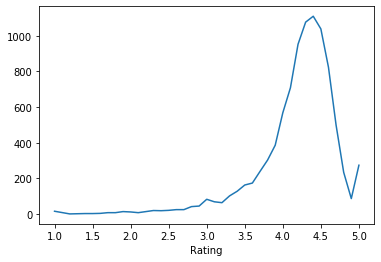

In [121]:
#Преобразуем размер приложения в единый вид.
df[df['Rating'] !=0].groupby(by='Rating')['App'].count().plot()

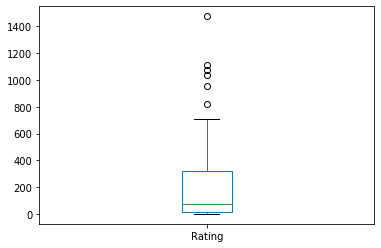

In [126]:
df.groupby(by='Rating')['Rating'].count().plot(kind='box')

In [127]:
sb.pair(df)

AttributeError: module 'seaborn' has no attribute 'pair'

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


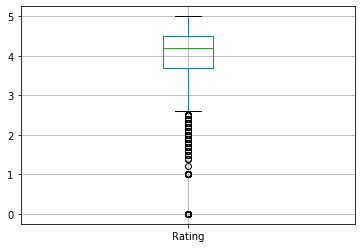

In [105]:
df.Rating.plot(kind='box',grid=True)

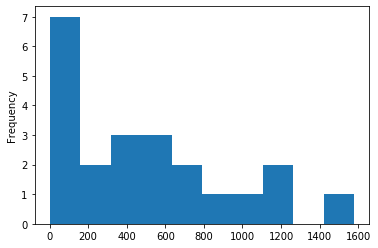

In [16]:
df.groupby(by='Installs')['App'].count().plot(kind='hist')

In [25]:
df.groupby(by='Installs')['App'].count()

Installs
0                    1
0+                  14
1+                  67
1,000+             907
1,000,000+        1579
1,000,000,000+      58
10+                386
10,000+           1054
10,000,000+       1252
100+               719
100,000+          1169
100,000,000+       409
5+                  82
5,000+             477
5,000,000+         752
50+                205
50,000+            479
50,000,000+        289
500+               330
500,000+           539
500,000,000+        72
Free                 1
Name: App, dtype: int64

In [24]:
df.groupby(by='Category')['App'].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

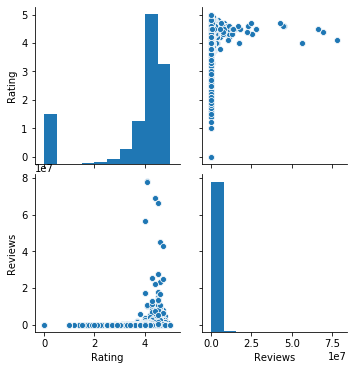

In [128]:
sb.pairplot(df)

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.